<a href="https://colab.research.google.com/github/edisonc57/chislennyye-metody/blob/main/Interpolaci%C3%B3n_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-D Интерполяция

In [8]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [9]:
x= np.linspace(0,4,12)
y= np.cos(x**2/3 +4)

print (x)
print(y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ]
[-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


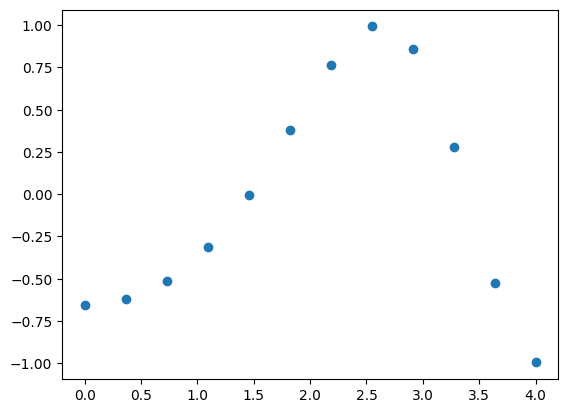

In [10]:
plt.plot (x,y,"o")

In [11]:
f1= interpolate.interp1d(x, y, kind= 'linear')

In [12]:
x_new= np.linspace(0,4,30)
y_new= f1(x_new)
print(f1(1.4))

-0.052653092166339566


In [13]:
f2= interpolate.interp1d(x,y, kind= 'cubic')
y2_new= f2(x_new)
print(f2(1.4))

-0.05901003040150796


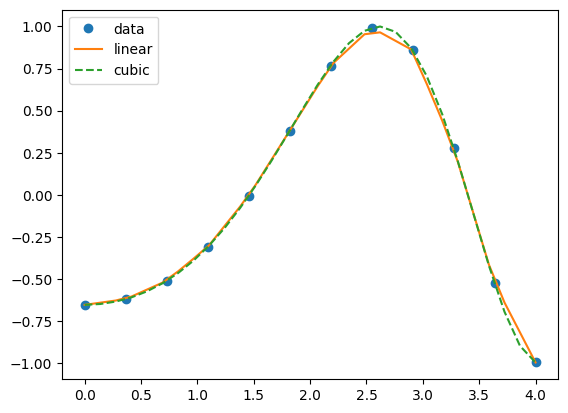

In [14]:
plt.plot(x, y, 'o', x_new, y_new, '-', x_new, y2_new, '--')
plt.legend(['data','linear','cubic' ], loc= 2)

#Пример 1

-0.4
0.6200000000000001


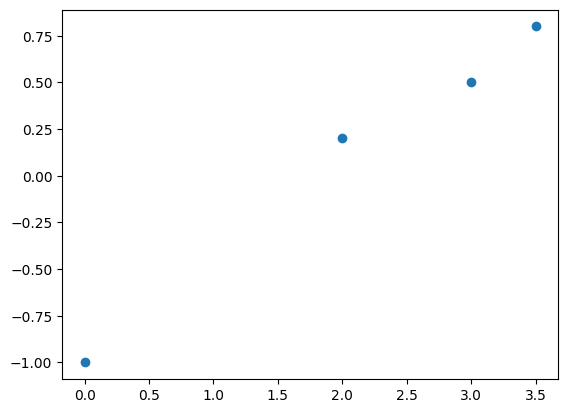

In [15]:
#Даны экспериментальные данные
x= np.array([0 ,2 , 3, 3.5])
y= np.array([-1, 0.2, 0.5, 0.8])
f1= interpolate.interp1d(x, y, kind= 'linear')
print(f1(1))
print(f1(3.2))
plt.plot(x,y,'o')

#Пример 2 - Интерполяционный многочлен Лагранжа

*** Интерполяционный многочлен Лагранжа***

In [16]:
#Таблица эксперименталных данных
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
x = np.array([0, 1/6,  1/2])
y = np.sin(np.pi*x)
poly = lagrange(x, y)

In [17]:
Polynomial(poly.coef[::-1]).coef
x_new2= np.arange(-1,4,0.5)

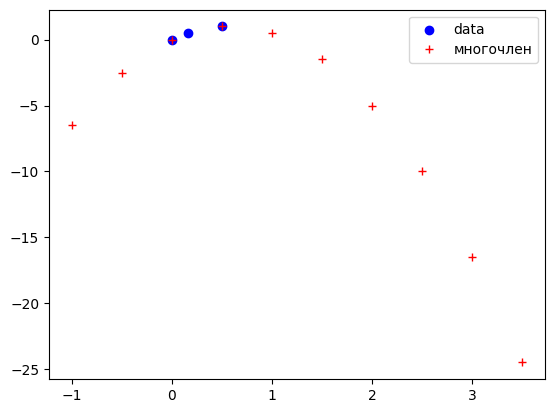

In [18]:
plt.scatter(x,y,label='data', color= 'b')
plt.plot(x_new2, Polynomial(poly.coef[::-1])(x_new2),'+', color='r', label= 'многочлен')
plt.legend()

In [19]:
nodos= np.array([1/4,1/3])
f_nodos= np.sin(np.pi*nodos)
print(poly(nodos))
print(f_nodos)
#print(poly(1/3))

[0.6875     0.83333333]
[0.70710678 0.8660254 ]


In [20]:
errores_absolutos = [abs(f_nodos - poly(nodos)) ]
print(errores_absolutos)

[array([0.01960678, 0.03269207])]


#Интерполяционный многочлен Нютона

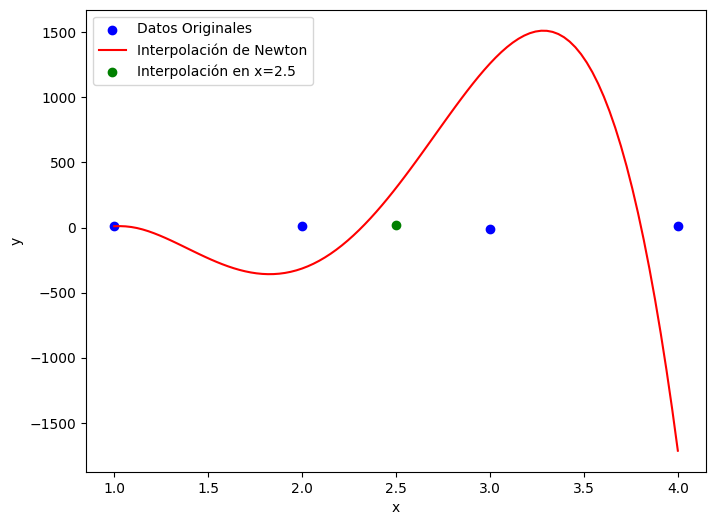

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular los coeficientes de las diferencias divididas
def coeficientes_diferencias_divididas(x, y):
    n = len(x)
    coeficientes = np.zeros(n)
    coeficientes[0] = y[0]

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            y[i] = (y[i] - y[i-1]) / (x[i] - x[i-j])
        coeficientes[j] = y[j]
    return coeficientes

# Función para realizar la interpolación de Newton
def interpolacion_newton(x, y, x_interp):
    coeficientes = coeficientes_diferencias_divididas(x, y)
    n = len(x) - 1
    resultado = coeficientes[n]

    for i in range(n-1, -1, -1):
        resultado = resultado * (x_interp - x[i]) + coeficientes[i]
    return resultado

# Datos de ejemplo (puntos de interpolación)
x = np.array([1, 2, 3, 4])
y = np.array([10, 25, 13, 40])

# Punto en el que deseas interpolar
x_interp = 2.5

# Calcular el valor interpolado en x_interp
y_interp = interpolacion_newton(x, y, x_interp)

# Visualización
plt.figure(figsize=(8, 6))

# Graficar los datos originales
plt.scatter(x, y, color='blue', label='Datos Originales')

# Graficar la interpolación
x_grafica = np.linspace(min(x), max(x), 100)  # Generar puntos para la gráfica
y_grafica = [interpolacion_newton(x, y, xi) for xi in x_grafica]  # Calcular valores interpolados
plt.plot(x_grafica, y_grafica, color='red', label='Interpolación de Newton')

# Marcar el punto interpolado
plt.scatter(x_interp, y_interp, color='green', label='Interpolación en x=2.5')

# Añadir etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Mostrar la gráfica
plt.show()


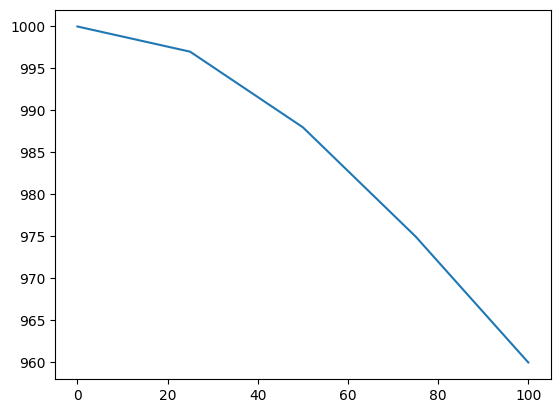

In [22]:
T= np.array([0,25,50,75,100])
D= np.array([1000,997,988,975,960])
plt.plot(T,D)

#Сплайны #1

In [5]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

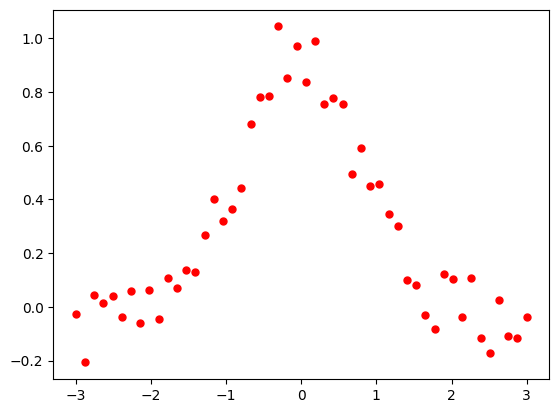

In [19]:
x = np.linspace(-3, 3, 50)
y= np.exp(-x**2) + 0.1* np.random.randn(50)
plt.plot(x,y,'ro', ms= 5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

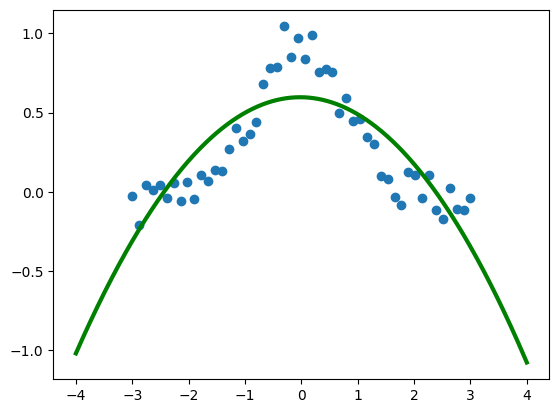

In [22]:
spl= UnivariateSpline(x,y)
xs= np.linspace(-4, 4, 1000)
plt.plot(x,y,'o', xs, spl(xs), 'g', lw=3)
plt.show

#Сплайны #2

In [24]:

from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

In [25]:
y = [1,3,4,3,5,7,5,6,8,7,8,9,8,7]
n = len(y)
x = range(0, n)

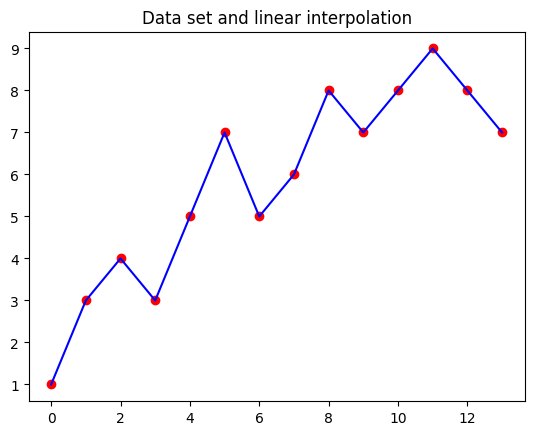

In [26]:
plt.plot(x,y,'ro')
plt.plot(x,y, 'b')
plt.title("Data set and linear interpolation")
plt.show()

In [31]:
tck = interpolate.splrep(x, y, s=0)
xfit1 = np.arange(0, n-1, np.pi/50)
yfit2 = interpolate.splev(xfit, tck, der=0)

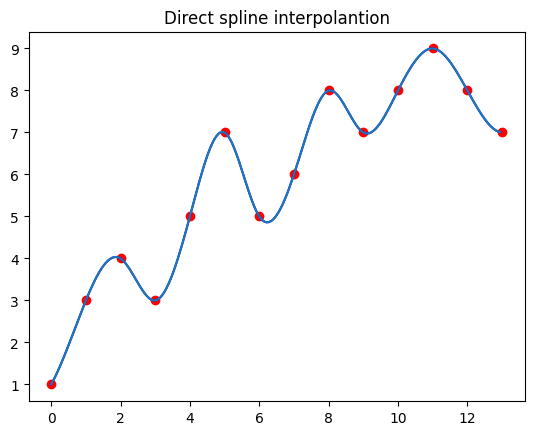

In [32]:
plt.plot(x, y, 'ro')
plt.plot(xfit1, yfit2,'b')
plt.plot(xfit1, yfit2)
plt.title("Direct spline interpolantion")
plt.show()

In [29]:
s = interpolate.InterpolatedUnivariateSpline(x, y)
xfit = np.arange(0, n-1, np.pi/50)
yfit = s(xfit)

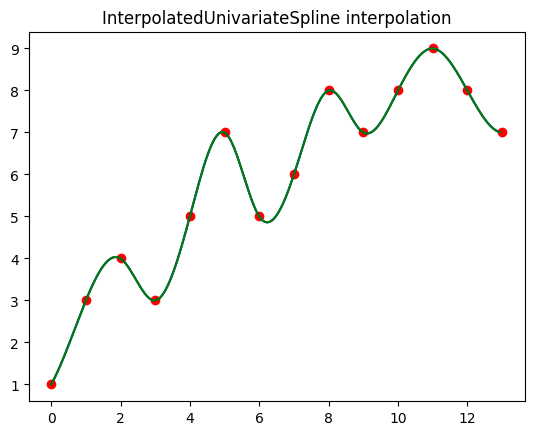

In [44]:
plt.plot(x, y, 'ro')
plt.plot(xfit1, yfit2,'b', xfit, yfit,'green')
plt.title("InterpolatedUnivariateSpline interpolation")
plt.show()